In [6]:
import pandas as pd
import numpy as np

import os
from env import get_db_url

import seaborn as sns
import matplotlib.pyplot as plt

# Acquire

In [7]:
def get_zillow_data():
    '''
    Arguments: none
    Actions: 
        1. If file exists in current working directory, opens file
        2. If file doesn't exist in current working directory, querys MySQL database and saves it to the current working directory
    Returns: df
    Modules: pandas as pd, from env import get_db_url, os
    '''
    
    # assigns filename
    filename = 'zillow.csv'
    
    # checks to see if the file exists in the working directory
    if os.path.exists(filename):
        
        # opens file and assigns it to a variable
        df = pd.read_csv(filename, index_col=0)
        
        # returns the df
        return df
    
    else:
        
        # assigns MySQL query to the variables
        query = '''SELECT
                      bedroomcnt,
                      bathroomcnt,
                      calculatedfinishedsquarefeet,
                      taxvaluedollarcnt,
                      yearbuilt,
                      taxamount,
                      fips
                    FROM properties_2017
                    WHERE propertylandusetypeID = 261;'''
        
        # creates a database variable
        db = 'zillow'
        
        # assign MySQL url to url variable
        url = get_db_url(db)
        
        # reads results from query and assigns it to df
        df = pd.read_sql(query, url)

        # saves results to local file
        df.to_csv(filename)
        
        # returns the dataframe
        return df

In [5]:
query = '''SELECT
  bedroomcnt,
  bathroomcnt,
  calculatedfinishedsquarefeet,
  taxvaluedollarcnt,
  yearbuilt,
  taxamount,
  fips
FROM properties_2017
WHERE propertylandusetypeID = 261;'''

In [6]:
url = get_db_url('zillow')

In [8]:
# df = pd.read_sql(query, url)

In [9]:
filename = 'zillow.csv'

In [10]:
# df.to_csv(filename)

NameError: name 'df' is not defined

In [ ]:
df.head()

In [12]:
df = get_zillow_data()

In [13]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


# Messy Data Summary


In [14]:
# checking rows and columns, I believe each row is a property and each columns is inforation about that property
df.shape

(2152863, 7)

In [15]:
# this is surprising, the non-null values do not appear in the info, but I know for a fact that some of these have nulls, we will have to inspect a diferent way
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [16]:
# finding null values
df['calculatedfinishedsquarefeet'].isna().value_counts()

False    2144379
True        8484
Name: calculatedfinishedsquarefeet, dtype: int64

In [17]:
# ok there is some variety here we need to investigate
for col in df:
    print(df[col].isna().value_counts())

SyntaxError: invalid syntax (1328930466.py, line 3)

**Notes:**

* ##### Nulls:
    * Bedroom and Bathroomcnt have the same number of null values, these may be the same properties/observations 
        * I think we will definitely just drop these instead of filling them in
    * fips doesn't have any missing values which makes sense becasue the fips is the location and a property listing without the location doesnt make any sense tbh you vant sell a property without knowing its locations
    * all other observations have larger amounts of data missing which I would like to investigate further before moving on. I think first, I want to see if there are
* ##### Floats:
    * Not all the values require the datatype to be a float, see if there is a way to avoid this when reading the file from its file location as a csv becasue thios is not something that happens in the sql query

**Action:**
* Investigate: taxamount, yearbuilt, taxvaluedollarcnt, and calculatedfinishedsquarefeet

In [ ]:
# checking to see how much data we will lose if we dorp the null values
(df.shape[0] - df.dropna().shape[0]) / df.shape[0]

# dropping the null values seems to be acceptable becasue it only reduces less than one percent of the data
# it depends on what we want to answer in the future tbh, but I believe that this 

In [62]:
# for time sake, I'm goint to just dopr the observations becasue of the low impact it will have on the data
df = df.dropna()

In [ ]:
df.describe()

**Takeaways:**
* bedroomcnt:
    * minimum of 0 seems suspicious
* bathroomcnt:
    * minimum of 0 seems suspicious
* calculatedfinishedsquarefeet
    * minimum of 1 seems suspicious
    
**Actions:**
* Look into the minimums of bedroomcnt, bathroomcnt, and calculatedfinishedsquarefeet

In [ ]:
# quite a few with 0 bathrooms, I dont know if this is accurate or not though. 
# I think need more domain knowledge to make an informed decision about this
df[df['bathroomcnt'] == 0]

In [19]:
# Consulted with the teacher, a family residence would likely have bathroom. It needs to be dropped
# dropping 0 bathroom units
df = df[df['bathroomcnt'] != 0]

In [ ]:
# there are also units with 0 bedrooms still left over and with the calculatedsquarefeet at 1
df.describe()

In [ ]:
# looking at unit s with one bedrooms - There appear to be a lot of inconsistencies with the minimum and maximums
df[df['bedroomcnt'] == 0].describe()

In [20]:
# dropping 0 bedroom homes
df = df[df['bedroomcnt'] != 0]

In [ ]:
# Looking into the calculated sqfeet
for col in df:
    sns.boxplot(data=df, x=col)
    plt.show()

In [ ]:
# the max calculated sqft is likely an error, droppping this value
# df = df[df.calculatedfinishedsquarefeet != df.calculatedfinishedsquarefeet.max()]

In [ ]:
# this is better, now lets look at the minimums
df.describe()

In [ ]:
# I think I will use standard deviations to eliminate the items that are likley not correct for the calculated fields

df.calculatedfinishedsquarefeet.mean(), df.calculatedfinishedsquarefeet.std()

In [21]:
# establish a range of values for dropping outliers with, I am goin to be cautious and use 0.05 as the buffer on each end
np.quantile(df['calculatedfinishedsquarefeet'], 0.95), np.quantile(df['calculatedfinishedsquarefeet'], 0.05)

(3537.0, 895.0)

In [22]:
# dropping outliers
df = df[(df.calculatedfinishedsquarefeet > 895) & (df.calculatedfinishedsquarefeet < 3537)]

In [23]:
# checking values
df.describe()

# will now look intpo the taxvaluedollacnt

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,1.921364e+06,1.921364e+06,1.921364e+06,1.921364e+06,1.921364e+06,1.921364e+06,1.921364e+06
mean,3.311135e+00,2.177501e+00,1.766047e+03,3.988857e+05,1.960945e+03,4.905463e+03,6.048559e+03
std,8.160386e-01,7.534983e-01,6.024771e+02,3.622314e+05,2.105369e+01,4.167820e+03,2.049077e+01
min,1.000000e+00,5.000000e-01,8.960000e+02,2.200000e+01,1.801000e+03,1.648000e+01,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.294000e+03,1.901920e+05,1.950000e+03,2.553180e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.624000e+03,3.242070e+05,1.959000e+03,4.058060e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.127000e+03,5.076240e+05,1.974000e+03,6.106760e+03,6.059000e+03
max,1.600000e+01,1.500000e+01,3.536000e+03,4.124780e+07,2.016000e+03,4.678122e+05,6.111000e+03


In [25]:
# looking at the max
df[df.taxvaluedollarcnt == df.taxvaluedollarcnt.max()]

# appears that there are zeros that dont belong there

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1327898,2.0,2.0,2024.0,41247800.0,1947.0,467812.25,6037.0


In [30]:
# it looks like the last 00.0 on these is not happendtsnace and not a good place to clean
df[df.taxvaluedollarcnt.astype(str).str[-4:] == '00.0']

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
46,4.0,4.0,1978.0,350000.0,2015.0,4836.07,6037.0
50,5.0,4.5,3207.0,900000.0,2015.0,10059.28,6059.0
61,3.0,2.5,2148.0,680000.0,1981.0,7909.14,6111.0
84,2.0,2.0,1304.0,940000.0,1980.0,10102.92,6111.0
93,3.0,1.0,1080.0,358000.0,1955.0,4135.12,6111.0
...,...,...,...,...,...,...,...
2152721,4.0,3.0,2567.0,703300.0,2009.0,8093.20,6059.0
2152736,3.0,3.5,1744.0,498000.0,2008.0,5803.04,6059.0
2152760,2.0,1.0,984.0,295000.0,2008.0,3648.41,6037.0
2152778,4.0,4.0,3035.0,600000.0,2010.0,7844.78,6037.0


In [44]:
# removing the top 5% and bottom 5% of the taxvaluedollarcnt
df = df[(df['taxvaluedollarcnt'] < np.quantile(df['taxvaluedollarcnt'], .95)) & (df['taxvaluedollarcnt'] > np.quantile(df['taxvaluedollarcnt'], .05))]

In [49]:
# the tax amount seems to be in a good place for the max and min
df[(df.taxamount == df.taxamount.max()) | (df.taxamount == df.taxamount.min())]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
463137,3.0,2.0,1365.0,75969.0,1940.0,16.48,6111.0
2118845,3.0,2.0,1613.0,269517.0,1972.0,100379.34,6059.0


**Thoughts:**
* I think it may be useful to do all of the chops with the entire df instead of with the widdled down df all at the same time becasue there may a cross over that happens because each time we reduce it by 10% when it can all happen at the same time likely reducing less of the dataset. While yes, there is a large dataset, I don't want to haphazardly get in the habit of chopping away at datasets when we cn retain more of it. 


In [6]:
df = get_zillow_data()
# df = df.dropna()
df.head()

NameError: name 'get_zillow_data' is not defined

In [84]:
# getting all the upper limits and lower limits from the original df and storing them in a dictionary
outlier_limits = {}
for col in df:
    if col == 'fips':
        pass
    else:
        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint') 
        Q2 = np.percentile(df[col], 50, interpolation = 'midpoint') 
        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint') 
        IQR = Q3 - Q1 
        outlier_limits[col] =  {'low_limit': np.percentile(df[col], 5, interpolation = 'midpoint'), 
                      'up_limit': Q3 + 1.5 * IQR,
                     }

In [94]:
for col in df:
    if col in outlier_limits:
        df = df[(df[col] <= outlier_limits[col]['up_limit'])]
        if col not in ['bathroomcnt', 'bedroomcnt']:
            df = df[(df[col] >= outlier_limits[col]['low_limit'])]

In [96]:
# ok everything looks good for the cleaning if you ask me!,
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,1.658269e+06,1.658269e+06,1.658269e+06,1.658269e+06,1.658269e+06,1.658269e+06,1.658269e+06
mean,3.310079e+00,2.183456e+00,1.761338e+03,3.696926e+05,1.963148e+03,4.557993e+03,6.049056e+03
std,7.673949e-01,6.939278e-01,5.789253e+02,2.103393e+05,1.890090e+01,2.378294e+03,2.081492e+01
min,0.000000e+00,0.000000e+00,8.890000e+02,6.264800e+04,1.923000e+03,1.002840e+03,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.313000e+03,2.100110e+05,1.951000e+03,2.777010e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.636000e+03,3.306970e+05,1.960000e+03,4.133120e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.105000e+03,4.923950e+05,1.976000e+03,5.934760e+03,6.059000e+03
max,5.000000e+00,4.500000e+00,3.633000e+03,1.052753e+06,2.016000e+03,1.221853e+04,6.111000e+03


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,1.656863e+06,1.656863e+06,1.656863e+06,1.656863e+06,1.656863e+06,1.656863e+06,1.656863e+06
mean,3.311868e+00,2.184941e+00,1.761290e+03,3.697233e+05,1.963149e+03,4.558347e+03,6.049039e+03
std,7.637771e-01,6.919624e-01,5.787750e+02,2.103358e+05,1.889253e+01,2.378340e+03,2.078969e+01
min,1.000000e+00,5.000000e-01,8.890000e+02,6.264800e+04,1.923000e+03,1.002840e+03,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.313000e+03,2.100150e+05,1.951000e+03,2.777360e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.636000e+03,3.307900e+05,1.960000e+03,4.133730e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.104000e+03,4.923950e+05,1.976000e+03,5.935170e+03,6.059000e+03
max,5.000000e+00,4.500000e+00,3.633000e+03,1.052753e+06,2.016000e+03,1.221853e+04,6.111000e+03


# Clean

In [5]:
import scipy.stats as stats

In [21]:
def clean_data(df):
    '''
    Arguments: zillow df
    Actions:
        1. Change data types
        2. Removes outliers
            a. Fips is skipped
            b. Monetary and year variables: 
                lower limit is bottom 5th percentile
                upper limit is Q3 + (1.5*IQR)
            c. Bedroom and Bathroom:
                lower limit is 1
                upper limit is Q3 + (1.5*IQR)
        3. Drop nulls
        4. Change column names
    Returns: cleaned df
    Modules:
        1. import scipy.stats as stats
        2. import pandas as pd
        3. import numpy as np
    '''
    
    # changing data types
    df['fips'] = df['fips'].astype(object)
    df['yearbuilt'] = df['yearbuilt'].astype(object)
    
    # remove outliers
    # initialize dict
    outlier_limits = {}
    
    # for each column in df
    for col in df:
        
        # skipping fips - this is a geographic indicator 
        if df[col].dtype != 'O':
            
            # set quartiles
            q1, q3 = df[col].quantile([.25, .75])
            
            # Set iqr 
            iqr = q3 - q1

            # add to dictionary with the upper limits and lower limits
            outlier_limits[col] =  {'low_limit_5': df[col].quantile(.05),
                                    'low_limit':  q1 - 1.5 * iqr,
                          'up_limit': q3 + 1.5 * iqr
                         }

    # for each cols
    for col in df:
        
        # if col in the dict key
        if col in outlier_limits:
           
            # remove all observations that exceed upper limit
            df = df[(df[col] <= outlier_limits[col]['up_limit'])]
            
            # remove all observations that are below the lower limit
            df = df[(df[col] >= outlier_limits[col]['low_limit'])]
    
    # drop nulls
    df = df.dropna()
    
    # change columns names
    df = df.rename(columns={'bedroomcnt': 'beds',
                  'bathroomcnt': 'baths',
                  'calculatedfinishedsquarefeet': 'square_feet',
                  'taxvaluedollarcnt': 'tax_value',
                   'yearbuilt': 'year_built',
                   'taxamount': 'tax_amount'
                  })
    
    # exit function with clean df
    return df

In [17]:
df = get_zillow_data()

In [20]:
df['yearbuilt']

In [22]:
df = clean_data(get_zillow_data())

In [23]:
df.shape

(1909948, 7)

In [98]:
df.isna().sum()

beds             0
baths            0
square_feet      0
tax_value        0
year_built     913
tax_amount       0
fips             0
dtype: int64

In [99]:
df.shape

(1910861, 7)

Outliers

In [87]:
df = get_zillow_data()

In [79]:
# drop outliers
# initialize dict
outlier_limits = {}

# for each column in df
for col in df:
    # skipping fips - this is a geographic indicator 
    if col in ['fips', 'yearbuilt']:
        pass
    # for all other columns
    else:
#         # get 1st quartile
#         q1 = np.percentile(df[col], 25, interpolation = 'midpoint') 
#         # get 3rd quartile 
#         q3 = np.percentile(df[col], 75, interpolation = 'midpoint') 

        q1, q3 = df[col].quantile([.25, .75])

        iqr = q3 - q1

#         # get the inter-quartile range
#         iqr = stats.iqr(df[col], interpolation = 'midpoint')

        # add to dictionary with the upper limits and lower limits
        outlier_limits[col] =  {'low_limit_5': df[col].quantile(.05),
                                'low_limit':  q1 - 1.5 * iqr,
                      'up_limit': q3 + 1.5 * iqr
                     }
outlier_limits

{'bedroomcnt': {'low_limit_5': 2.0, 'low_limit': 1.5, 'up_limit': 5.5},
 'bathroomcnt': {'low_limit_5': 1.0, 'low_limit': 0.5, 'up_limit': 4.5},
 'calculatedfinishedsquarefeet': {'low_limit_5': 888.0,
  'low_limit': -169.5,
  'up_limit': 3634.5},
 'taxvaluedollarcnt': {'low_limit_5': 61879.0,
  'low_limit': -331364.875,
  'up_limit': 1054062.125},
 'taxamount': {'low_limit_5': 997.4,
  'low_limit': -3284.0299999999993,
  'up_limit': 12233.329999999998}}

In [80]:
# for each cols
for col in df:

    # if col in the dict key
    if col in outlier_limits:

        # remove all oservations that exceed upper limit
        df_limited = df[(df[col] < outlier_limits[col]['up_limit'])]

        # remove all observations that are under the lower limit
        df_limited = df[(df[col] > outlier_limits[col]['low_limit'])]

In [81]:
df_limited.isna().sum()

bedroomcnt                         2
bathroomcnt                        2
calculatedfinishedsquarefeet    6729
taxvaluedollarcnt                 31
yearbuilt                       7603
taxamount                          0
fips                               0
dtype: int64

In [82]:
df_limited.shape

(2148421, 7)

In [83]:
missing_thresh = .004
exclude_missing = []
num_rows = df.shape[0]
for c in df.columns:
    num_missing = df[c].isna().sum()
    missing_frac = num_missing / num_rows
    if missing_frac > missing_thresh:
        exclude_missing.append(c)
print(exclude_missing)

['yearbuilt']


Null

In [159]:
df = df.rename(columns={'bedroomcnt': 'beds',
                  'bathroomcnt': 'baths',
                  'calculatedfinishedsquarefeet': 'square_feet',
                  'taxvaluedollarcnt': 'tax_value',
                   'yearbuilt': 'year_built',
                   'taxamount': 'tax_amount'
                  })

In [24]:
df = clean_data(get_zillow_data())

In [152]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [130]:
df.shape

(1656862, 7)

In [131]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,1.656862e+06,1.656862e+06,1.656862e+06,1.656862e+06,1.656862e+06,1.656862e+06,1.656862e+06
mean,3.311869e+00,2.184942e+00,1.761291e+03,3.697232e+05,1.963149e+03,4.558346e+03,6.049039e+03
std,7.637767e-01,6.919614e-01,5.787750e+02,2.103358e+05,1.889254e+01,2.378341e+03,2.078970e+01
min,1.000000e+00,1.000000e+00,8.890000e+02,6.264800e+04,1.923000e+03,1.002840e+03,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.313000e+03,2.100150e+05,1.951000e+03,2.777360e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.636000e+03,3.307895e+05,1.960000e+03,4.133725e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.104000e+03,4.923950e+05,1.976000e+03,5.935170e+03,6.059000e+03
max,5.000000e+00,4.500000e+00,3.633000e+03,1.052753e+06,2.016000e+03,1.221853e+04,6.111000e+03


# Splitting

In [4]:
from sklearn.model_selection import train_test_split

In [149]:
def split_data(df):
    '''
    Arguments: clean dataframe
    Actions: splits Dataframe into a train, validate, and test datasets for explorations
    Returns: train, validate, and test datasets
    Modules:
        1. from sklearn.model_selection import train_test_split
    '''
    # splitting with test focus
    train_val, test = train_test_split(df, train_size=.8, random_state=1017)
    
    #splitting with train/validate focus
    train, validate = train_test_split(train_val, train_size=.7, random_state=1017)
    
    return train, validate, test

In [145]:
train, validate, test = split_data(df)

In [84]:
train.shape[0] + validate.shape[0] + test.shape[0] == df.shape[0]

False

# Wrangle Function

In [157]:
def wrangle_zillow():
    '''
    Arguments: none
    Actions:
        1. Gets zillow data
        2. Cleans zillow data
        3. Splits zillow data
    Returns: train, validate, test
    Modules: get_zillow_data, clean_data, split_data
    '''
    # splits cleaned data into train, validate, test
    train, validate, test = split_data(
        
        # cleans data
        clean_data(
        
            # retrieves data
            get_zillow_data()))
    
    # exits function with wrangled data
    return train, validate, test

In [154]:
train, validate, test = wrangle_zillow()

In [156]:
train.shape

(927842, 7)

# Testing wrangle

In [1]:
from wrangle import wrangle_zillow

In [2]:
train, validate, test = wrangle_zillow()

In [3]:
train.shape[0], validate.shape[0], test.shape[0]

(1069570, 458388, 381990)

# Review

In [13]:
df = get_zillow_data()

In [15]:
cols = [col for col in df.columns if col not in ['fips', 'yearbuilt']]

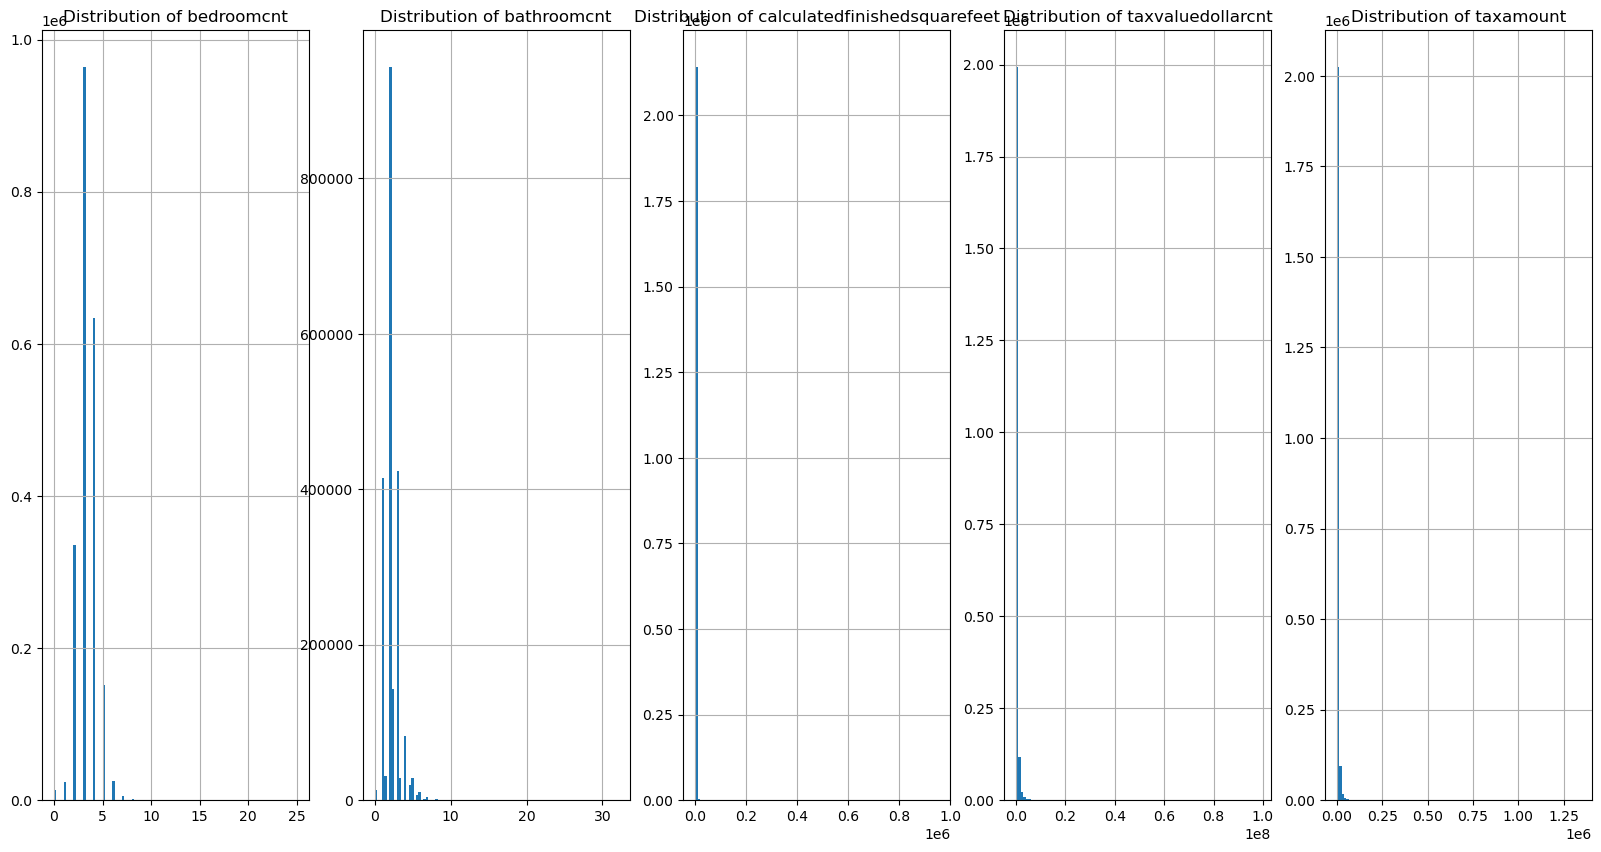

In [19]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=100)

<AxesSubplot:>

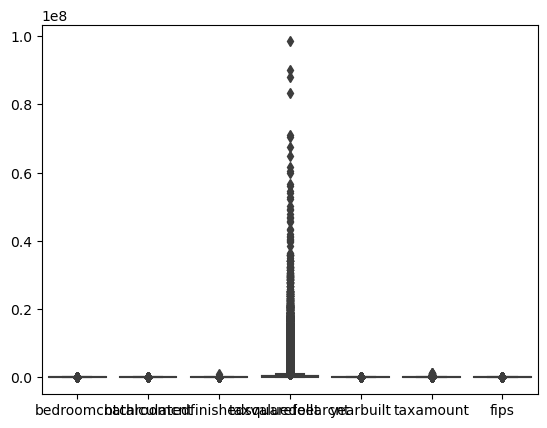

In [21]:
sns.boxplot(data=df)

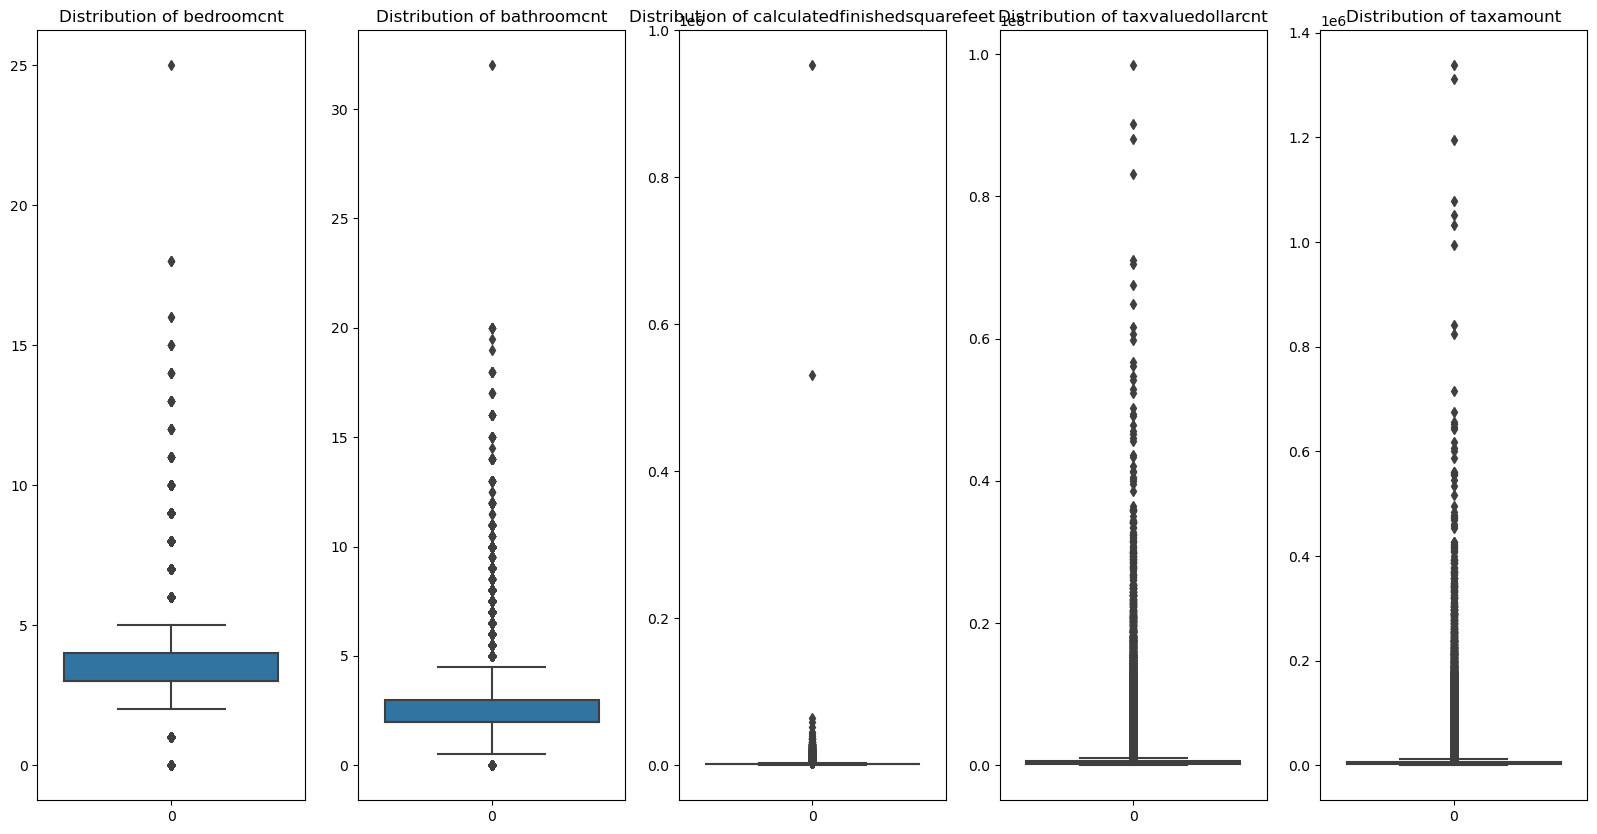

In [22]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    sns.boxplot(data=df[col])

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00
